# Wrong model approach

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
xtrain_df = pd.read_csv('dataset/x_train.csv')
ytrain_df = pd.read_csv('dataset/y_train.csv')
xtest_df = pd.read_csv('dataset/x_test.csv')

In [13]:
print(xtrain_df.head())
print(xtrain_df.tail())
print(ytrain_df.head())
print(xtest_df.head())

     High
0  332.83
1  333.87
2  330.75
3  328.77
4  322.29
        High
1252  793.32
1253  792.74
1254  797.86
1255  794.23
1256  785.93
     High
0  333.87
1  330.75
2  328.77
3  322.29
4  315.72
     High
0  789.63
1  791.34
2  794.48
3  807.90
4  809.97


In [18]:
print(xtrain_df.shape)
print(ytrain_df.shape)
print(xtest_df.shape)

(1257, 1)
(1257, 1)
(19, 1)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


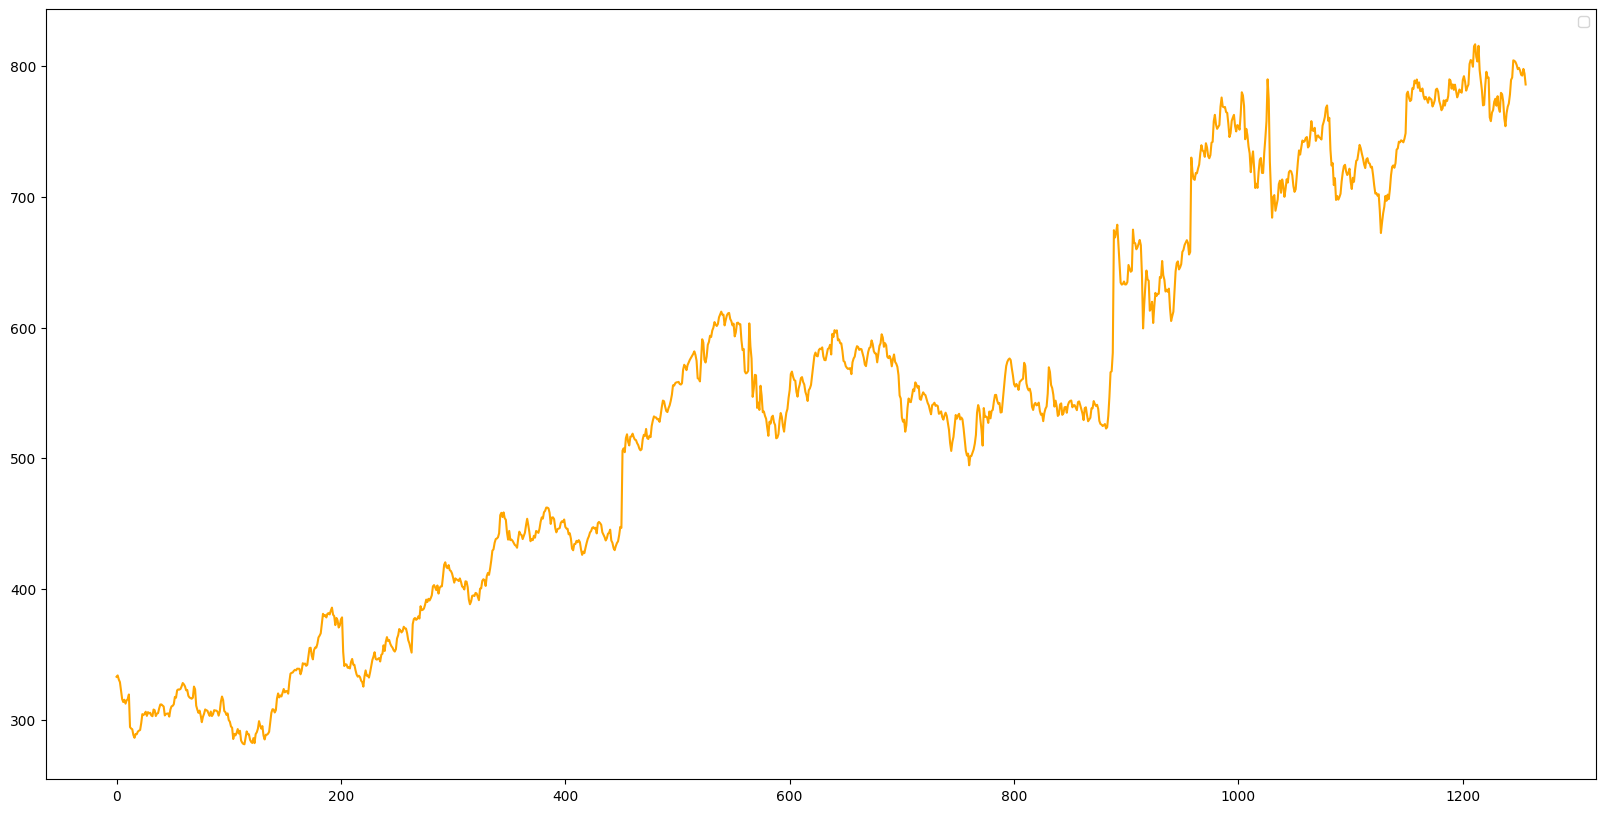

In [29]:
def drawPlot(x, label=None, color="orange", title=""):
    plt.figure(figsize=(20, 10))
    plt.plot(x, label=label, color=color)
    plt.title(title)
    plt.legend()
    plt.show()

drawPlot(xtrain_df)

In [33]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
df1 = scaler.fit_transform(np.array(xtrain_df).reshape((-1, 1)))
print(df1.shape)

split_size = int(df1.shape[0] * 0.65)
train_data = df1[:split_size, :]
test_data = df1[split_size:, :]

(1257, 1)


In [38]:
print(test_data.shape, train_data.shape)

(440, 1) (817, 1)


In [45]:
train_data[:5], train_data.shape

(array([[0.09640129],
        [0.09834351],
        [0.09251685],
        [0.08881917],
        [0.07671765]]),
 (817, 1))

In [42]:
def create_dataset(x, timestep=150):
    data_x, data_y = [], []
    m = x.shape[0]
    for i in range(m - timestep - 1):
        a = x[i: i + timestep, :]
        b = x[i + timestep, 0]
        data_x.append(a)
        data_y.append(b)

    return np.array(data_x), np.array(data_y)

train_x, train_y = create_dataset(train_data)
test_x, test_y = create_dataset(test_data)

In [47]:
print(train_x.shape, train_y.shape)
print(test_x.shape, test_y.shape)

(666, 150, 1) (666,)
(289, 150, 1) (289,)


In [52]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint

model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(150, 1)))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(64))
model.add(Dense(1))
model.summary()

checkpoint = ModelCheckpoint('best_model.h5', verbose=True, monitor='val_accuracy', save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
h = model.fit(train_x, train_y, batch_size=64, epochs=100, validation_data=(test_x, test_y), verbose=True, callbacks=[checkpoint, early_stopping])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 150, 64)           16896     
                                                                 
 lstm_13 (LSTM)              (None, 150, 64)           33024     
                                                                 
 lstm_14 (LSTM)              (None, 64)                33024     
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 83009 (324.25 KB)
Trainable params: 83009 (324.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
11/11 [==============================] - ETA: 0s - loss: 0.0476 - accuracy: 0.0000e+00
Epoch 1: val_accuracy improved from -inf to 0.003

C:\Users\hhars\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - ETA: 0s - loss: 0.0080 - accuracy: 0.0000e+00
Epoch 2: val_accuracy did not improve from 0.00346
11/11 [==============================] - 5s 428ms/step - loss: 0.0080 - accuracy: 0.0000e+00 - val_loss: 0.0047 - val_accuracy: 0.0035
Epoch 3/100
11/11 [==============================] - ETA: 0s - loss: 0.0039 - accuracy: 0.0000e+00
Epoch 3: val_accuracy did not improve from 0.00346
11/11 [==============================] - 5s 428ms/step - loss: 0.0039 - accuracy: 0.0000e+00 - val_loss: 0.0267 - val_accuracy: 0.0035
Epoch 4/100
11/11 [==============================] - ETA: 0s - loss: 0.0020 - accuracy: 0.0000e+00
Epoch 4: val_accuracy did not improve from 0.00346
11/11 [==============================] - 5s 425ms/step - loss: 0.0020 - accuracy: 0.0000e+00 - val_loss: 0.0137 - val_accuracy: 0.0035
Epoch 5/100
11/11 [==============================] - ETA: 0s - loss: 0.0014 - accuracy: 0.0000e+00
Epoch 5: val_accuracy did not improve from 0.00346
11/11 [

In [ ]:
model.load_weights('best_model.h5')

In [57]:
train_predict = model.predict(train_x)
test_predict = model.predict(test_x)

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

train_predict

10/10 [==============================] - 1s 80ms/step


array([[350.64297],
       [351.62436],
       [352.59222],
       [353.53162],
       [354.42227],
       [355.2817 ],
       [356.14075],
       [357.01614],
       [357.91245],
       [358.8296 ],
       [359.76276],
       [360.69986],
       [361.6316 ],
       [362.5462 ],
       [363.4318 ],
       [364.2623 ],
       [365.03052],
       [365.75235],
       [366.43405],
       [367.0806 ],
       [367.68726],
       [368.25296],
       [368.8006 ],
       [369.36453],
       [369.96237],
       [370.57666],
       [371.1808 ],
       [371.7799 ],
       [372.3808 ],
       [372.98358],
       [373.5948 ],
       [374.23184],
       [374.90448],
       [375.61823],
       [376.396  ],
       [377.26886],
       [378.23636],
       [379.28772],
       [380.39594],
       [381.54282],
       [382.7082 ],
       [383.86673],
       [385.0069 ],
       [386.12375],
       [387.18933],
       [388.17963],
       [389.05405],
       [389.811  ],
       [390.44717],
       [390.94592],


In [67]:
print(np.sqrt(np.sum(np.square(train_predict - train_y.reshape((-1, 1))))))

11659.794725959397


In [69]:
model.evaluate(train_x, train_y)

21/21 [==============================] - 2s 84ms/step - loss: 0.0095 - accuracy: 0.0000e+00


[0.00950924027711153, 0.0]